In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
import pandas as pd
import seaborn as sns

import cv2
import skvideo.io
import imageio
import pytube

import os
import time
import csv
import re
import humanize
from tqdm import tqdm

from skimage.measure import compare_mse, compare_ssim, compare_nrmse
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import hamming
from imageai.Detection import ObjectDetection

Using TensorFlow backend.


In [3]:
def video_to_image2(video_loc, img_folder, dataset_type, start_idx=0, end_idx=100000, img_quality=90):
    """
    A function to read video and store the frames
    
    Parameters
    ----------
    video_loc: str
        Location of the input video
    img_folder: str
        Folder to store the frames
    dataset_type: str
        Name of the csv file that will store the location of each frames
    start_idx: int
        Start frame to read from the video
    end_idx: int
        End frame to read from the video
    img_quality: int
        Image quality when storing the frames
    
    Outputs
    -------
        The function will store the frames under `img_folder` and write a csv file that contains
        the location of each frames
    """
    
    raw = {}
    
    cap = cv2.VideoCapture(video_loc)
    idx = 0
    ret = True
    while ret:
        ret, frame = cap.read()
        if idx > start_idx:
            img_path = os.path.join(img_folder, str(idx)+'.jpg')
            raw[idx] = [img_path, idx]
            frame = cv2.flip(frame, -1)
            cv2.imwrite(img_path, frame, [cv2.IMWRITE_JPEG_QUALITY, img_quality])
        idx += 1
        if idx == end_idx:
            break
    cap.release()
    
    print('Done with %d frames' % (end_idx - start_idx - 1))
    print('Start index: ', start_idx)
    print('End index: ', end_idx)
    
    raw_df = pd.DataFrame.from_dict(raw, orient='index')
    raw_df.columns = ['img_path', 'img_index']
    raw_df.to_csv(os.path.join(data_path, dataset_type+'_raw.csv'), index=False)

In [4]:
## Some working path
save_path = '/home/idies/workspace/Storage/Cong/persistent/video/data'
data_path = '/home/idies/workspace/Storage/Cong/persistent/video/data'
result_path = '/home/idies/workspace/Storage/Cong/persistent/video/result'

In [5]:
## The location of the video and the folder to store the frames
train_video = os.path.join(data_path, 'LapTimer-20180624-091108.mp4')
train_imgs = os.path.join(data_path, 'imgs091108')

In [6]:
## Read video
video_to_image2(train_video, train_imgs, 'train091108', 3450, 27970, 30)

Done with 24519 frames
Start index:  3450
End index:  27970


In [7]:
## csv file that contains the location of each frame
train_df = pd.read_csv(os.path.join(data_path, 'train091108_raw.csv'))
train_df.shape

(24519, 2)

In [8]:
train_df.head()

,img_path,img_index
0,/home/idies/workspace/Storage/Cong/persistent/...,3451
1,/home/idies/workspace/Storage/Cong/persistent/...,3452
2,/home/idies/workspace/Storage/Cong/persistent/...,3453
3,/home/idies/workspace/Storage/Cong/persistent/...,3454
4,/home/idies/workspace/Storage/Cong/persistent/...,3455


Shape:  (1080, 1920, 3)


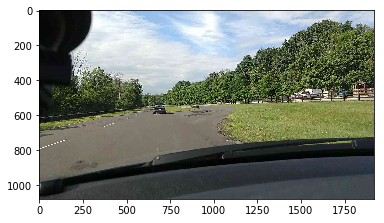

In [9]:
## One example frame
img = imread(train_df['img_path'][0])
print('Shape: ', img.shape)
imshow(img);